# Practice 04: Newton-Raphson Method Failure Case

---

### Problem

Apply the Newton-Raphson method to the equation:
$$ f(x) = x^3 - 2x^2 -3x + 10 = 0 $$
with an initial guess of $x_0 = 1.9$. Justify what happens.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return x**3 - 2*x**2 - 3*x + 10

def df(x):
    return 3*x**2 - 4*x - 3

def newton_raphson_tracker(f, df, x0, max_iter=10):
    history = []
    xk = x0
    for k in range(max_iter):
        fxk = f(xk)
        dfxk = df(xk)
        history.append([k, xk, fxk, dfxk])
        if abs(dfxk) < 1e-12:
            print("Derivative is zero. Cannot continue.")
            break
        xk = xk - fxk / dfxk
    return pd.DataFrame(history, columns=["k", "x_k", "f(x_k)", "f'(x_k)"])

# Execute with the problematic initial guess
x0 = 1.9
history_df = newton_raphson_tracker(f, df, x0)

print(f"--- Newton-Raphson Iterations with x0 = {x0} ---")
display(history_df.style.hide_index())


--- Newton-Raphson Iterations with x0 = 1.9 ---


AttributeError: The '.style' accessor requires jinja2

### Justification of the Behavior

The results show a classic case where Newton's method behaves erratically due to a poor initial guess. Let's analyze why.

#### 1. The Core Problem: A Near-Zero Derivative
The Newton-Raphson iteration formula is:
$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} $$
The method runs into trouble when the derivative $f'(x_k)$ is close to zero. A small denominator leads to a very large value for the fraction, causing the next guess, $x_{k+1}$, to be thrown very far away from the current guess.

At our starting point, $x_0 = 1.9$:
- $f(1.9) = (1.9)^3 - 2(1.9)^2 - 3(1.9) + 10 = 3.939$
- $f'(1.9) = 3(1.9)^2 - 4(1.9) - 3 = 0.23$

The derivative, $f'(1.9) = 0.23$, is very close to zero. This means the tangent line to the curve at $x=1.9$ is nearly horizontal. The first iteration calculates:
$$ x_1 = 1.9 - \frac{3.939}{0.23} \approx 1.9 - 17.126 = -15.226 $$
This explains the massive jump from $1.9$ to $-15.226$ in the first step.

#### 2. Eventual Convergence
Despite the chaotic start, the iteration $x_1 = -15.226$ lands in a region where the function's behavior is more stable (the derivative is large). From this new point, the method is successfully "attracted" to the true root of the function, which is $x = -2$. We can verify this is a root:
$$ f(-2) = (-2)^3 - 2(-2)^2 - 3(-2) + 10 = -8 - 8 + 6 + 10 = 0 $$

The derivative at the root is far from zero, ensuring stable and fast convergence once the approximations get close:
$$ f'(-2) = 3(-2)^2 - 4(-2) - 3 = 12 + 8 - 3 = 17 $$

#### 3. Graphical Explanation
The plot below shows the function (in blue) and its derivative (in orange). We can clearly see that our initial guess $x_0=1.9$ is very close to a local minimum of the function, where the derivative $f'(x)$ crosses zero. This is a highly unstable region for Newton's method.

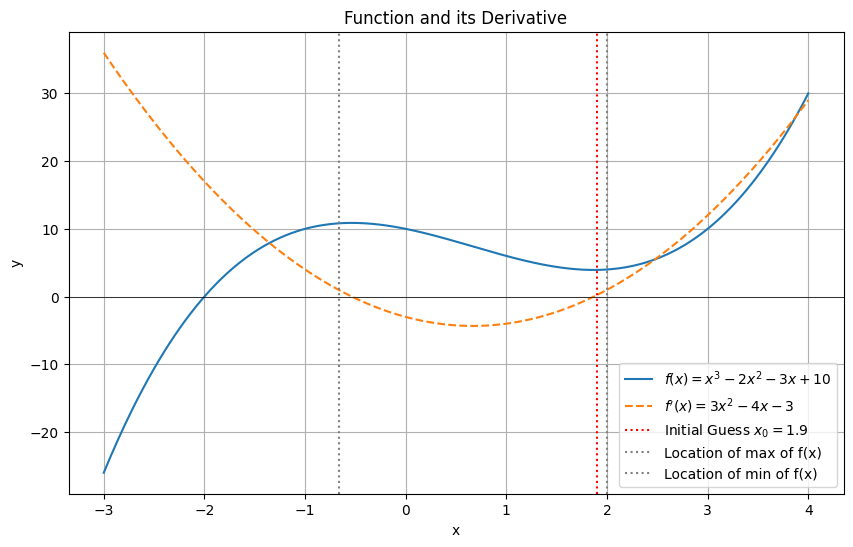

In [2]:
x_vals = np.linspace(-3, 4, 400)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f(x_vals), label='$f(x) = x^3 - 2x^2 - 3x + 10$')
plt.plot(x_vals, df(x_vals), label="$f'(x) = 3x^2 - 4x - 3$", linestyle='--')

plt.axhline(0, color='black', lw=0.5)
plt.axvline(x0, color='red', linestyle=':', label=f'Initial Guess $x_0={x0}$')
plt.axvline(-2/3, color='gray', linestyle=':', label='Location of max of f(x)')
plt.axvline(2, color='gray', linestyle=':', label='Location of min of f(x)')
plt.title("Function and its Derivative")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()